### Day 2 - Lists and Iteration
Run the following cell to import the necessary packages:

In [1]:
# the plotting package is matplotlib:
import matplotlib.pyplot as plt 
# the next line allows you to view the plots more easily:
%matplotlib inline
# the numpy package has important math stuff in it:
import numpy as np 
# the math package has important math stuff in it:
import math
# the pandas package allows us to do spreadsheet stuff:
import pandas as pd

### Free Falling Body Answer

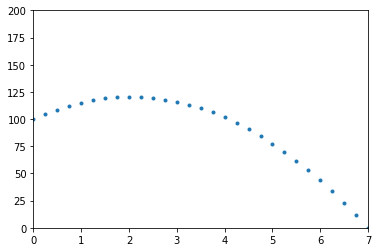

In [8]:
def p(t,v0,p0):
    return -.5*9.8*t**2+v0*t+p0

def ball_motion(v0,p0):
    T = (-v0-np.sqrt(v0**2-4*(-4.9)*p0))/(-2*4.9)
#    t = np.arange(0,T+.25,0.25)
    t = np.arange(0,100,0.25)
#    print(T)
    plt.plot(t,p(t,v0,p0), '.')
    plt.axis([0,7,0,200]) #xmin,xmax,ymin,ymax
    
ball_motion(20,100)

Recall Euler's method to approximate the solution to $\frac{dy}{dx} = f(x,y)$. We'll write a program called euler that takes in a function $f(x,y)$, an initial x value $x_0$, an initial y value $y_0$, a step size $h$, and an end x value $x_n$ and returns the end y-value approximation. We'll simultaneously update the x and y values:

In [5]:
def euler(f,x0,y0,h,xn):
    steps = int((xn-x0)/h)
    for i in range(steps):
        x0, y0 = x0 + h, y0+h*f(x0)
        print(x0, y0)
    return y0

print(euler(np.sin, 0, 1, 0.5, 2))

0.5 1.0
1.0 1.2397127693021015
1.5 1.6604482617060499
2.0 2.159195755008077
2.159195755008077


Notice that up until now, we've been only printing values, not storing them for later use. If we want to plot the Euler's method solution, for example, we'll definitely want to store all of the Euler's method (x,y) coordinates in a list. Therefore, let's learn about lists next.

### Lists
Lists start at index 0 (not 1). 

We can reference the length of the list using "len".

Here's a list of dogs:

In [13]:
dogs = ['border collie', 'australian cattle dog', 'labrador retriever']
print(dogs)
print(dogs[0])
print(dogs[1])
print(dogs[2])
print(dogs[-1])
print(len(dogs))

['border collie', 'australian cattle dog', 'labrador retriever']
border collie
australian cattle dog
labrador retriever
labrador retriever
3


We can create empty lists using square brackets.

We can add things to lists by using .append:

In [7]:
dogs = []
dogs.append('pit bull')
dogs.append('boxer')
dogs.append('labrador')
print(dogs)

['pit bull', 'boxer', 'labrador']


We can loop through lists in two different ways. Firstly, by item:

In [17]:
for doggie in dogs:
    print(doggie)

border collie ['border collie', 'australian cattle dog', 'labrador retriever']
australian cattle dog ['border collie', 'australian cattle dog', 'labrador retriever']
labrador retriever ['border collie', 'australian cattle dog', 'labrador retriever']


Secondly, by index:

In [22]:
print(dogs)
for i in range(len(dogs)):
    print(i, dogs[i])

['border collie', 'australian cattle dog', 'labrador retriever']
0 border collie
1 australian cattle dog
2 labrador retriever


Here's an example where I sum all of the expenses in my list:

In [24]:
def sum_expenses(expenses):
    counter = 0
    for expense in expenses:
        print(expense, counter)
        counter = counter + expense
    return counter

expenses = [20, 100, -50, 0, 80]
sum_expenses(expenses)


20 0
100 20
-50 120
0 70
80 70


150

Another way to do it using index:

In [26]:
def sum_expenses(expenses):
    counter = 0
    for i in range(len(expenses)):
        counter = counter + expenses[i]
        print(i,expenses[i], counter)
    return counter

expenses = [20, 100, -50, 0, 80]

sum_expenses(expenses)

0 20 20
1 100 120
2 -50 70
3 0 70
4 80 150


150

We can also sort lists:

In [4]:
expenses = [20, 100, -50, 0, 80]
expenses.sort()
print(expenses)

[-50, 0, 20, 80, 100]


Beware, though, since the sort method edits the list in place and returns nothing, you never want to make a list equal to list.sort:

In [5]:
expenses = [20, 100, -50, 0, 80]
expenses = expenses.sort()
print(expenses)

None


How could we use sort to ensure that the test the sides of a triangle accordingly?

In [27]:
def is_possible(a,b,c):
    if a+b > c:
        return True
    else:
        return False
    
def triangle_type(a,b,c):
    if a**2+b**2 > c**2:
        return "Acute"
    elif a**2+b**2 == c**2:
        return "Right"
    else: 
        return "Obtuse"
    
a = int(input('a: '))
b = int(input('b: '))
c = int(input('c: '))

sides_list = [a, b, c]
sides_list.sort()

a, b, c = sides_list[0], sides_list[1], sides_list[2]
print(a,b,c)
if is_possible(a,b,c):
    print(triangle_type(a,b,c))
else:
    print('Your triangle is not possible.')

a: 7
b: 6
c: 5
5 6 7
Acute


We often want to add things to a list within a for loop. To add all of the integers between 0 and 10, we can type:

In [32]:
integers = []
for i in range(11):
    integers.append(i)
print(integers)

import numpy as np
print(np.arange(0,11,1))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[ 0  1  2  3  4  5  6  7  8  9 10]


What if we wanted to add all of the factors of 20 to a list?

In [13]:
factors = []
for i in range(1,21):
    if 20 % i == 0:
        factors.append(i)
print(factors)

[1, 2, 4, 5, 10, 20]


Going back to Euler's method, we can create two lists, one for the x and one for the y coordinates.

In [37]:
def euler(f,x0,y0,h,xn):
    x = np.arange(x0,xn+h,h) #generates list of x coordinates between x0 and x1 using step size h
    y = [y0]
    print(x[0], y[0])
    for i in range(1,len(x)):
#        y_new = y[i-1]+h*f(x[i-1])
        y_new = y[-1]+h*f(x[i-1])
        y.append(y_new)
        print(x[i], y[i])

euler(np.sin, 0, 1, 0.5, 2)

0.0 1
0.5 1.0
1.0 1.2397127693021015
1.5 1.6604482617060499
2.0 2.159195755008077


We can then plot the coordinates:

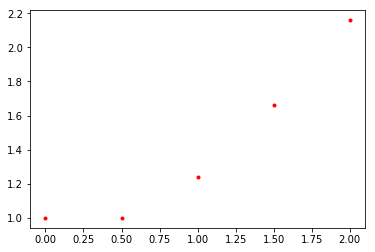

In [7]:
def euler(f,x0,y0,h,xn):
    x = np.arange(x0,xn+h,h) 
    y = [y0]
    for i in range(1,len(x)):
        y0 = y0+h*f(x[i-1])
        y.append(y0)
    plt.plot(x,y,'r.')

euler(np.sin, 0, 1, 0.5, 2)

How does the Euler's method approximation compare to the true solution $y=2-\cos(x)$?

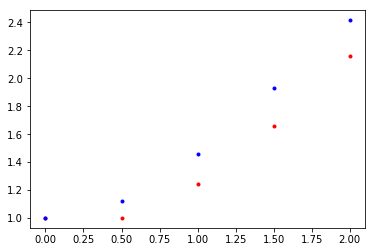

In [8]:
def euler(f,x0,y0,h,xn):
    x = np.arange(x0,xn+h,h) 
    y = [y0]
    for i in range(1,len(x)):
        y0 = y0+h*f(x[i-1])
        y.append(y0)
    plt.plot(x,y,'r.') #approximate
    plt.plot(x,2-np.cos(x),'b.') #exact

euler(np.sin, 0, 1, 0.5, 2)

As one last example, suppose I want to create the Fibonacci sequence by referencing the last two items in my list and adding them. The indices "-1" and "-2" reference the last two items in the list:

In [18]:
def fibonacci(n):
    sequence = [1,1]
    for i in range(2,n):
        sequence.append(sequence[-1]+sequence[-2])
    return sequence

fibonacci(7)

[1, 1, 2, 3, 5, 8, 13]

### In-class Exercise: Great Lakes Pollution or SIRS Infectious Disease
Look at Great Lakes Problem (precal) or the SIRS infectious disease problem (calc). Use iteration and plotting to view the solution. First, do the iteration in a spreadsheet and THEN do it in Python.

### In-class or for homework bonus exercise: China Population - A Leslie Model
Open the "china shorter handout." Model the population of China. You can do this using the above techniques OR if you know a little bit of linear algebra you can use it. Here are some tips.

You can perform many linear algebra operations using the linalg package inside scipy. 
You can create matrices:

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg

A=np.matrix([[1,2,2], [4,4,2],[4,6,4]])
B=np.matrix([[3],[6],[10]])

print(A)
print(B)

[[1 2 2]
 [4 4 2]
 [4 6 4]]
[[ 3]
 [ 6]
 [10]]


Multiply, find the determinant, and find the inverse of matrices:

In [10]:
print('A*B')
print(A*B)
print('det(A)')
print(linalg.det(A))
print('inv(A)')
print(linalg.inv(A))

A*B
[[35]
 [56]
 [88]]
det(A)
4.0
inv(A)
[[ 1.   1.  -1. ]
 [-2.  -1.   1.5]
 [ 2.   0.5 -1. ]]


Solve the matrix equation Ax = B two different ways:

In [11]:
print('using the inverse to solve:')
print(linalg.inv(A).dot(B))
print('using solve:')
linalg.solve(A,B)

using the inverse to solve:
[[-1.]
 [ 3.]
 [-1.]]
using solve:


array([[-1.],
       [ 3.],
       [-1.]])

And find eigenvalues and eigenvectors:

In [12]:
eigenvalues, eigenvectors = linalg.eig(A)
print(eigenvalues)

[ 9.46714344+0.j         -0.23357172+0.60659557j -0.23357172-0.60659557j]


For the China model, multiplying the Leslie matrix by the initial population a given number of times would give you the populations later in time. Finding the largest real eigenvalue would give you the population growth rate.

### Introduction to Simulations
### Random Numbers

To generate a random number between 0 and 1, we can use the random package:

In [38]:
import random

print(random.random())

0.12110184842319838


To generate five random numbers, we could create a loop:

In [11]:
for i in range(5):
    print(random.random())

0.016743594838911746
0.5913719559312534
0.21321701744832366
0.6002908824833492
0.9160990708969389


To simulate five rolls of a die between 1 and 6, inclusive, type:

In [39]:
for i in range(5):
    print(random.randint(1,6))

4
2
4
5
6


We can also use the random function to pick random elements from a list. For example, to pick a random student's name from a group of 5 students, we could type:

In [42]:
students = ['Jack', 'Abby', 'Mary', 'Peter', "Stella"]
print(random.choice(students))


Stella


If I wanted to generate two random names from the list, I could use the sample method, which samples without replacement:

In [14]:
students = ['Jack', 'Abby', 'Mary', 'Peter', "Stella"]
print(random.sample(students,2))

['Abby', 'Mary']


Suppose you want to simulate rolling a die and add each die roll to a list. Yes, you can create a list of numbers 1,2,3,4,5, and 6, but if you do rand(sample, 3), then you'll never get the same number twice, which doesn't make sense, since the rolls of the dice are independent of each other. To randomly generate ten rolls and add them to a list, where some numbers may be the same, type:

In [43]:
rolls = []
for i in range(10):
    rolls.append(random.randint(1,6))
print(rolls)

[1, 5, 4, 3, 5, 2, 3, 5, 3, 5]


What if it wasn't a fair die? What if the probability of getting each number was given by:

|  Die Face |Probability   |
|---   |---   |
|1 |0.05  | 
|2 | 0.05 |
|3 |0.50  |
|4 | 0.10 |
|5 |0.20  |
|6 | 0.10 |

Then we would select numbers between 0 and 99 based on the above probabilities. For example, since there is a 5% chance that we will roll a 1, we'll assign the numbers 0,1,2,3, and 4 to the die roll 1. Here are fifty rolls:

In [44]:
rolls = []
for i in range(50):
    roll = random.randint(0,99)
    if 0 <= roll < 5:
        rolls.append(1)
    if 5 <= roll < 10:
        rolls.append(2)
    if 10 <= roll < 60:
        rolls.append(3)
    if 60 <= roll < 70:
        rolls.append(4)
    if 70 <= roll < 90:
        rolls.append(5)
    if 90 <= roll < 100:
        rolls.append(6)
print(rolls)

[6, 3, 5, 1, 6, 3, 5, 3, 1, 6, 3, 4, 3, 5, 3, 2, 3, 3, 2, 5, 3, 1, 3, 3, 2, 3, 5, 5, 5, 6, 3, 3, 5, 3, 1, 3, 6, 1, 5, 3, 6, 5, 5, 3, 4, 4, 6, 3, 3, 3]


(array([ 5.,  0.,  3.,  0., 21.,  0.,  3.,  0., 11.,  7.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

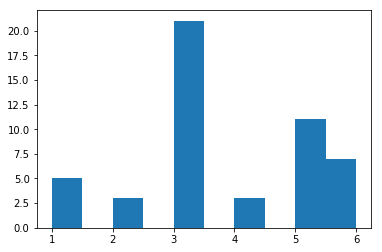

In [45]:
plt.hist(rolls)

What was our average die roll?

In [46]:
print(sum(rolls)/len(rolls))
print(np.mean(rolls))

3.66
3.66


As another example, suppose that you have an unfair coin that has a 60% probability of coming up heads and you toss it ten times. On average, what percentage of the time will you get at least 8 heads out of 10?

First, we can create one list of 10 tosses.

In [18]:
tosses = []
for i in range(10):
    toss = random.randint(0,9)
    if 0 <= toss < 6:
        tosses.append('H')
    else:
        tosses.append('T')
print(tosses)

['H', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'T', 'H']


We can calculate the percentage of heads that show up:

In [19]:
print(tosses.count('H')/len(tosses))

0.8


Now, we can run this simulation 10,000 times, and each time, save the percentage of heads that we see. The first 10 percentages that we see are:

In [20]:
percent_heads = []
for i in range(10000):
    tosses = []
    for i in range(10):
        toss = random.randint(0,9)
        if 0 <= toss < 6:
            tosses.append('H')
        else:
            tosses.append('T')
    percent = tosses.count('H')/len(tosses)
    percent_heads.append(percent)

print(percent_heads[0:10])

[0.5, 0.4, 0.5, 0.9, 0.7, 0.6, 0.6, 0.5, 0.4, 0.9]


Lastly, to figure out what percentage of the time we got 8 or more heads, we'll count the number of times we got 8, 9, or 10 heads, and then divide by the number of simulations:

In [21]:
print((percent_heads.count(0.8) + percent_heads.count(0.9) + percent_heads.count(1.0))/len(percent_heads))

0.1664


### Some homework problems
### Exercise 5 - Discrimination Example
In a company, there are 20 men and 10 women. Layoffs come and there are 5 men and 5 women that get laid off. Is this evidence of discrimination against women? Simulate how often women get laid off in higher percentages than men, given the makeup of the company.

### Exercise 6 - Cereal Box Simulation
20% of the cereal boxes contained a picture of Tiger Woods, 30% Lance Armstrong,
and the rest Serena Williams. How many boxes on average do you expect to have to buy before you get a complete set?